# Lab 6 Correlation

## Acknnowledgement: This lab is a modified version of a lab of UC Berkeley data 8 course.


In [1]:
!pip install datascience

     |████████████████████████████████| 51kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 92kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 13.0MB 33kB/s  eta 0:00:01███████████████████▌           | 8.3MB 210kB/s eta 0:00:23       | 8.9MB 210kB/s eta 0:00:20
     |████████████████████████████████| 215kB 2.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1d/e7/fd8b501e7a6dfe492a433deb7b9d833d39ca74916fa8bc63dd1a4947a671/Jinja2-2.10.1-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 13.7MB/s eta 0:00:01
  Created wheel for datascience: filename=datascience-0.15.3-cp35-none-any.whl size=44582 sha256=1d924117d4bb23f090735228171b1c534ce89e042e34c7e75ad57fad9acc1716
  Stored in directory: /home/nbuser/.cache/pip/wheels/b8/37/0a/80274866028f6485c5957f0e1acf8e2b755fbe9dd0fd4ad275
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=19851 sha256=75693cb8ec9498f5e7875e96e319b2ad5776131576e162879c35cd96f

      Successfully uninstalled matplotlib-2.1.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# 1. How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

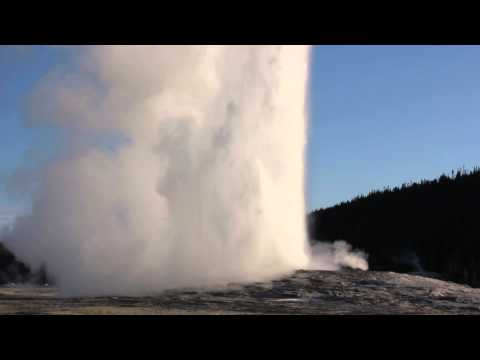

In [3]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others. Whenever there is a long eruption, it usually followed by an even longer wait before the next eruption.
If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park in the meantime instead of waiting by the geyser. Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption. It includes the following columns:
- duration: Eruption duration, in minutes.
- wait: Time between this eruption and the next, also in minutes.

Run the next cell to load the dataset.

In [4]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


### Visualize the relationship between two variables using scatter plot
One way to get a sense of possible relationships between two variables (i.e., two columns in a data table) is to use scatter plot, which shows each row (i.e., specific values of two variables on the same row) as a dot in a two-dimensional plot, where the x-axis and the y-axis corresponds to the two variables.

There are multiple ways to generate a scatter plot.  In this lab, we will use .scatter method of Table in the datascience module.

### One of the parameter of scatter is 'fit_line'.  If the value of the parameter is True (a Boolean value, not 'True' which is a string), the scatter plot will also show a line that is the result of "fitting" the data.  The slope of the line indicates whether the correlation relationship is positive or negative.
- Positive Correlation: The fitted line has a positive slope. When X increases, Y also increases.
- Negative Correlation: The fitted line has a negative slope. When X increases, Y actually decreases.

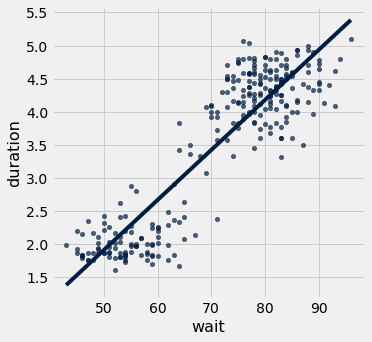

In [5]:
faithful.scatter('wait','duration',fit_line=True)

### Note: 
    If we are interested in the possibility to predict the duration of Faithful eruption from the waiting time, it is conventional to put the column we want to predict (i.e., duration in this case) on the vertical (y) axis and the the column we want to use for prediction.
    For the .scatter method, this means the first parameter is for the horizontal (x) axis, and the second parameter is for the vertical (y) axis.
    

### Exercise 1:
Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?


### Answer to Exercise 1: 
The relationship between eruption duration and waiting time is roughly linear and positive based on the scatter plot above.

# 2. What Correlate with Movie Sales?

In [6]:
movies = Table.read_table('IMDB5000movies.csv')
movies.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police officer|terror ...,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701,English,USA,PG-13,2.5e+08,2012,23000,8.5,2.35,164000
nan,Doug Walker,nan,nan,131,nan,Rob Walker,131,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,nan,0,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,nan,nan,nan,nan,nan,nan,12,7.1,nan,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,7.30587e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738,English,USA,PG-13,2.637e+08,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,3.3653e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902,English,USA,PG-13,2.58e+08,2007,11000,6.2,2.35,0
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,2.00807e+08,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387,English,USA,PG,2.6e+08,2010,553,7.8,1.85,29000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|captain amer ...,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117,English,USA,PG-13,2.5e+08,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,3.01957e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973,English,UK,PG,2.5e+08,2009,11000,7.5,2.35,10000


### Exercise 2
1. Generate a scatter plot of the two variables: 'gross' and 'movie_facebook_likes' uising .scatter method of Table.
2. Generate a scatter plot of the two mariables: 'gross' and 'num_voted_users' using.scatter method.
3. Described whether the graphs suggest a correlation relationship between the two variables.

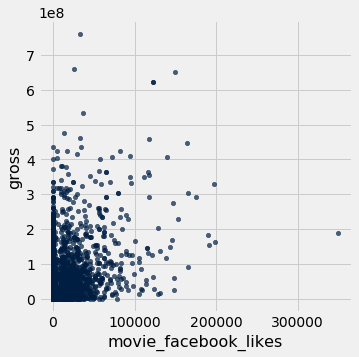

In [7]:
movies.scatter('movie_facebook_likes','gross',fit_line=True)

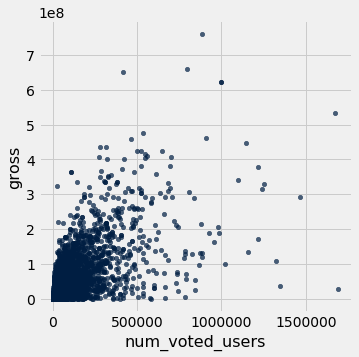

In [8]:
movies.scatter('num_voted_users','gross',fit_line=True)

### Answer to Exercise 2:  
Both graphs do not have a correlation with its variables. 

### Cleaning Data 
Even though we were able to generate the scatter plot, the fit line can not be generated.  One possible reasons for this is some of the movies do not have gross sales data.  To check this, we can sort the gross sales in descending order (because movies without gross sales data will have "nan" value, and they appear before numerical gross value in the sorted list of movies).

In [9]:
movies3=movies.sort("gross",descending=True)
movies3.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,nan,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0,nan,http://www.imdb.com/title/tt2107644/?ref_=fn_tt_tt_1,3,English,USA,nan,1400,2013,0,6.3,nan,16
Color,nan,43,43,nan,319,Valorie Curry,841,nan,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_tt_tt_1,359,English,USA,TV-14,nan,nan,593,7.5,16,32000
Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,nan,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_tt_tt_1,6,English,Canada,nan,nan,2013,470,7.7,nan,84
Color,Anthony Vallone,nan,84,2,2,John Considine,45,nan,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_tt_tt_1,1,English,USA,PG-13,3250,2005,44,7.8,nan,4
Color,Ash Baron-Cohen,10,98,3,152,Stanley B. Herman,789,nan,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1,corruption|homeless|homeless man|motorcycle|urban legend,http://www.imdb.com/title/tt0109266/?ref_=fn_tt_tt_1,14,English,USA,nan,nan,1995,194,6.4,nan,20
Color,Thomas L. Phillips,13,82,120,84,Joe Coffey,785,nan,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary; Quite a Conundrum,133,1111,John Lucas,nan,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_tt_tt_1,8,English,USA,nan,200000,2012,98,5.4,16,424
Color,Tadeo Garcia,nan,84,5,12,Michael Cortez,21,nan,Drama,Tatiana Suarez-Pico,On the Downlow,156,62,Eric Ambriz,2,gang initiation|gunplay|hazing|latino|shakespeare's rome ...,http://www.imdb.com/title/tt0390323/?ref_=fn_tt_tt_1,3,English,USA,nan,nan,2004,20,6.1,nan,22
Black and White,Ivan Kavanagh,12,83,18,0,Michael Parle,10,nan,Horror,Patrick O'Donnell,Tin Can Man,57,15,Emma Eliza Regan,0,nan,http://www.imdb.com/title/tt1235811/?ref_=fn_tt_tt_1,1,English,Ireland,nan,10000,2007,5,6.7,1.33,105
Color,Jason Trost,42,78,91,86,Jason Trost,407,nan,Sci-Fi|Thriller,Sean Whalen,All Superheroes Must Die,1771,674,Nick Principe,0,arch villain|game of death|kidnapping|superhero,http://www.imdb.com/title/tt1836212/?ref_=fn_tt_tt_1,35,English,USA,Unrated,20000,2011,91,4,2.35,835
Black and White,Jim Chuchu,6,60,0,4,Olwenya Maina,147,nan,Drama,Paul Ogola,Stories of Our Lives,70,170,Mugambi Nthiga,0,nan,http://www.imdb.com/title/tt3973612/?ref_=fn_tt_tt_1,1,Swahili,Kenya,nan,15000,2014,19,7.4,nan,45


### Remove Movies without Gross Sales
To remove movies without gross sales data (this is often referred to as "missing data" in Data Science), we can select movies whose gross sales are greater than 0.  The movies with "nan" as gross vaues will fail the test.  This way, only movies with gross sales data will be selected using.

### Exercise 3
Complete the code below so that only movies with actual gross sales data are selected in the filtered table (i.e., stored in the variable movies2).

In [10]:
movies2=movies.where("gross",are.above(0))
movies2.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police officer|terror ...,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701,English,USA,PG-13,2.5e+08,2012,23000,8.5,2.35,164000
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,7.30587e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738,English,USA,PG-13,2.637e+08,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,3.3653e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902,English,USA,PG-13,2.58e+08,2007,11000,6.2,2.35,0
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,2.00807e+08,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387,English,USA,PG,2.6e+08,2010,553,7.8,1.85,29000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|captain amer ...,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117,English,USA,PG-13,2.5e+08,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,3.01957e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973,English,UK,PG,2.5e+08,2009,11000,7.5,2.35,10000
Color,Zack Snyder,673,183,0,2000,Lauren Cohan,15000,3.30249e+08,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0,based on comic book|batman|sequel to a reboot|superhero| ...,http://www.imdb.com/title/tt2975590/?ref_=fn_tt_tt_1,3018,English,USA,PG-13,2.5e+08,2016,4000,6.9,2.35,197000


In [11]:
movies.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police officer|terror ...,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701,English,USA,PG-13,2.5e+08,2012,23000,8.5,2.35,164000
nan,Doug Walker,nan,nan,131,nan,Rob Walker,131,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,nan,0,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,nan,nan,nan,nan,nan,nan,12,7.1,nan,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,7.30587e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738,English,USA,PG-13,2.637e+08,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,3.3653e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902,English,USA,PG-13,2.58e+08,2007,11000,6.2,2.35,0
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,2.00807e+08,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387,English,USA,PG,2.6e+08,2010,553,7.8,1.85,29000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|captain amer ...,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117,English,USA,PG-13,2.5e+08,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,3.01957e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973,English,UK,PG,2.5e+08,2009,11000,7.5,2.35,10000


### Exercise 4
Use the filtered movie table (i.e., movies2) that contains only movies with actual gross data, generate 
(1) the scatter plot of num_voted_users and gross with fit_line='True"
(2) the scatter plot of movie_facebook_likes and gross with fit_line='True'

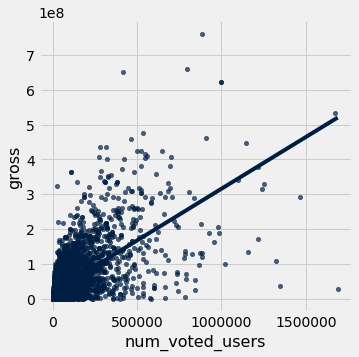

In [13]:
movies2.scatter('num_voted_users','gross',fit_line=True)

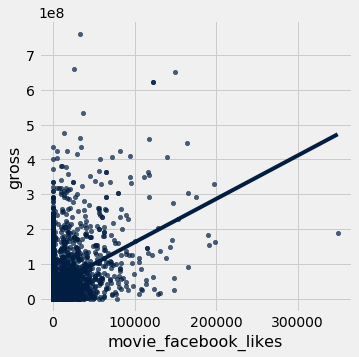

In [14]:
movies2.scatter('movie_facebook_likes','gross',fit_line=True)

# 3. Correlation Analysis of Features
One of the use of correlation analysis in Data Science is to use it
for feature selection and/or dimension reduction.  Even though the topic of
feature selection and dimension reduction will be covered in your future
course on machine learning (DS 310 or CMPSC 448), we will use the NFL
pass prediction problem to demonstrate a simple example of correlation analysis 
of features.

In [16]:
Ben_pass=Table.read_table('Ben-NE-9-10-2015-pass-6.csv')
Ben_pass

down,ydstogo,Yards.Gained.PrevPlay,AirYards,PassLocation,PassOutcome
1,10,18,-4,1,1
1,10,0,9,1,1
3,22,6,1,1,1
1,10,0,7,-1,1
1,10,13,6,-1,1
1,10,12,7,-1,1
1,10,0,5,1,0
2,10,0,25,1,0
3,5,-1,6,-1,1
1,15,4,-1,1,1


### Exercise 5
Plot the scatter plot between 'down' and 'ydstogo' with fit_line='True'.
What is the correlation relationship between down and ydstogo (e.g., positive, negative, or no correlation relationship)?

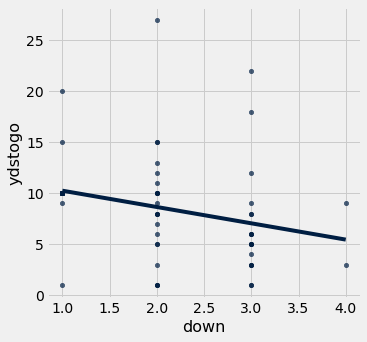

In [22]:
Ben_pass.scatter('down','ydstogo',fit_line=True)

### Answer to Exercise 5:
The correlation relationship between down and ydstogo is negative.

### Exercise 6
Find two features that you believe are positive correlatred. 
Verify their positive correlationship using a scatter plot with fit_line='True'.

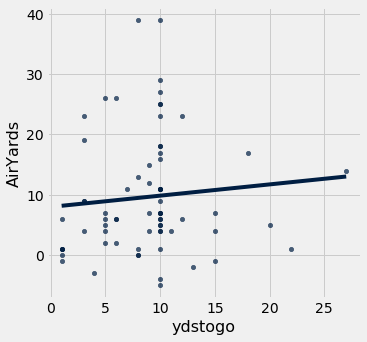

In [39]:
Ben_pass.scatter('ydstogo','AirYards',fit_line=True)

### Answer to Exercise 6
The two features that are positively correlated are 'ydstogo' and 'AirYards.'